In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
import numpy as np
gdp_per_capita = pd.read_csv('Desktop/пет проект/gdp_per_capita.csv', sep=';')
merged_data = pd.read_csv('Desktop/пет проект/merged_data.csv', sep=';')
organized_crime = pd.read_csv('Desktop/пет проект/organized_crime.csv', sep=';')

In [2]:
merged_data

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value
0,Asia,Western Asia,Turkey,"6,89","6,4",7,9,9,4,3,...,"6,5",2,4,4,"3,5","3,5",2021,US$,"9661,23",TUR
1,Africa,West Africa,Cabo Verde,"4,04","3,7","4,5",2,"2,5","2,5",4,...,"7,5",5,6,"3,5",6,7,2021,US$,"3293,23",CPV
2,Africa,Southern Africa,South Africa,"6,63",6,"4,5",4,8,"3,5","7,5",...,6,6,6,4,5,7,2021,US$,"7055,06",ZAF
3,South America,South America,Colombia,"7,66","7,2","7,5",7,8,6,7,...,"4,5",6,5,"3,5","4,5","6,5",2021,US$,"6104,14",COL
4,South America,South America,Peru,"6,35","6,2",7,6,"5,5",7,"5,5",...,5,"4,5",4,"3,5",3,"4,5",2021,US$,"6621,65",PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,Caribbean,Jamaica,"5,91","4,2",5,3,"8,5","1,5",2,...,"6,5","4,5","4,5",5,6,"6,5",2021,US$,"5183,58",JAM
189,North America,Caribbean,St. Vincent and the Grenadines,"3,3","2,85","2,5",1,4,1,2,...,6,"5,5",4,3,6,6,2021,US$,"8440,03",VCT
190,Europe,Central & Eastern Europe,Slovenia,"4,29","3,95",4,"5,5","3,5",2,3,...,"7,5","6,5",5,6,6,6,2021,US$,"29134,8",SVN
191,North America,Caribbean,St. Lucia,"4,09","3,05",4,"1,5",5,2,1,...,"5,5",4,"5,5",5,6,4,2021,US$,"9824,06",LCA


In [3]:
merged_data.columns

Index(['Continent', 'Region', 'Country', 'Criminality', 'Criminal markets',
       'Human trafficking', 'Human smuggling', 'Arms trafficking',
       'Flora crimes', 'Fauna crimes', 'Non-renewable resource crimes',
       'Heroin trade', 'Cocaine trade', 'Cannabis trade',
       'Synthetic drug trade', 'Criminal actors', 'Mafia-style groups',
       'Criminal networks', 'State-embedded actors', 'Foreign actors',
       'Resilience', 'Political leadership and governance',
       'Government transparency and accountability',
       'International cooperation', 'National policies and laws',
       'Judicial system and detention', 'Law enforcement',
       'Territorial integrity', 'Anti-money laundering',
       'Economic regulatory capacity', 'Victim and witness support',
       'Prevention', 'Non-state actors', 'Year', 'Unit',
       'GDP Per Capita (US$)', 'Code Value'],
      dtype='object')

In [4]:
merged_data.rename(columns={'GDP Per Capita (US$)':'gdp_per_capita'}, inplace=True)

In [5]:
merged_data['Criminality'] = merged_data['Criminality'].str.replace(',', '.')
merged_data['Criminality'] = merged_data['Criminality'].astype(float)

In [6]:
merged_data['Government transparency and accountability'] = merged_data['Government transparency and accountability'].str.replace(',', '.')
merged_data['Government transparency and accountability'] = merged_data['Government transparency and accountability'].astype(float)

In [7]:
merged_data

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,gdp_per_capita,Code Value
0,Asia,Western Asia,Turkey,6.89,"6,4",7,9,9,4,3,...,"6,5",2,4,4,"3,5","3,5",2021,US$,"9661,23",TUR
1,Africa,West Africa,Cabo Verde,4.04,"3,7","4,5",2,"2,5","2,5",4,...,"7,5",5,6,"3,5",6,7,2021,US$,"3293,23",CPV
2,Africa,Southern Africa,South Africa,6.63,6,"4,5",4,8,"3,5","7,5",...,6,6,6,4,5,7,2021,US$,"7055,06",ZAF
3,South America,South America,Colombia,7.66,"7,2","7,5",7,8,6,7,...,"4,5",6,5,"3,5","4,5","6,5",2021,US$,"6104,14",COL
4,South America,South America,Peru,6.35,"6,2",7,6,"5,5",7,"5,5",...,5,"4,5",4,"3,5",3,"4,5",2021,US$,"6621,65",PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,Caribbean,Jamaica,5.91,"4,2",5,3,"8,5","1,5",2,...,"6,5","4,5","4,5",5,6,"6,5",2021,US$,"5183,58",JAM
189,North America,Caribbean,St. Vincent and the Grenadines,3.30,"2,85","2,5",1,4,1,2,...,6,"5,5",4,3,6,6,2021,US$,"8440,03",VCT
190,Europe,Central & Eastern Europe,Slovenia,4.29,"3,95",4,"5,5","3,5",2,3,...,"7,5","6,5",5,6,6,6,2021,US$,"29134,8",SVN
191,North America,Caribbean,St. Lucia,4.09,"3,05",4,"1,5",5,2,1,...,"5,5",4,"5,5",5,6,4,2021,US$,"9824,06",LCA


In [8]:
merged_data.dtypes

Continent                                      object
Region                                         object
Country                                        object
Criminality                                   float64
Criminal markets                               object
Human trafficking                              object
Human smuggling                                object
Arms trafficking                               object
Flora crimes                                   object
Fauna crimes                                   object
Non-renewable resource crimes                  object
Heroin trade                                   object
Cocaine trade                                  object
Cannabis trade                                 object
Synthetic drug trade                           object
Criminal actors                                object
Mafia-style groups                             object
Criminal networks                              object
State-embedded actors       

In [9]:
merged_data['gdp_per_capita'] = merged_data['gdp_per_capita'].str.replace(',', '.')
merged_data['gdp_per_capita'] = merged_data['gdp_per_capita'].astype(float)

In [10]:
merged_data

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,gdp_per_capita,Code Value
0,Asia,Western Asia,Turkey,6.89,"6,4",7,9,9,4,3,...,"6,5",2,4,4,"3,5","3,5",2021,US$,9661.23,TUR
1,Africa,West Africa,Cabo Verde,4.04,"3,7","4,5",2,"2,5","2,5",4,...,"7,5",5,6,"3,5",6,7,2021,US$,3293.23,CPV
2,Africa,Southern Africa,South Africa,6.63,6,"4,5",4,8,"3,5","7,5",...,6,6,6,4,5,7,2021,US$,7055.06,ZAF
3,South America,South America,Colombia,7.66,"7,2","7,5",7,8,6,7,...,"4,5",6,5,"3,5","4,5","6,5",2021,US$,6104.14,COL
4,South America,South America,Peru,6.35,"6,2",7,6,"5,5",7,"5,5",...,5,"4,5",4,"3,5",3,"4,5",2021,US$,6621.65,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,Caribbean,Jamaica,5.91,"4,2",5,3,"8,5","1,5",2,...,"6,5","4,5","4,5",5,6,"6,5",2021,US$,5183.58,JAM
189,North America,Caribbean,St. Vincent and the Grenadines,3.30,"2,85","2,5",1,4,1,2,...,6,"5,5",4,3,6,6,2021,US$,8440.03,VCT
190,Europe,Central & Eastern Europe,Slovenia,4.29,"3,95",4,"5,5","3,5",2,3,...,"7,5","6,5",5,6,6,6,2021,US$,29134.80,SVN
191,North America,Caribbean,St. Lucia,4.09,"3,05",4,"1,5",5,2,1,...,"5,5",4,"5,5",5,6,4,2021,US$,9824.06,LCA


                Criminality  gdp_per_capita
Criminality        1.000000       -0.348614
gdp_per_capita    -0.348614        1.000000


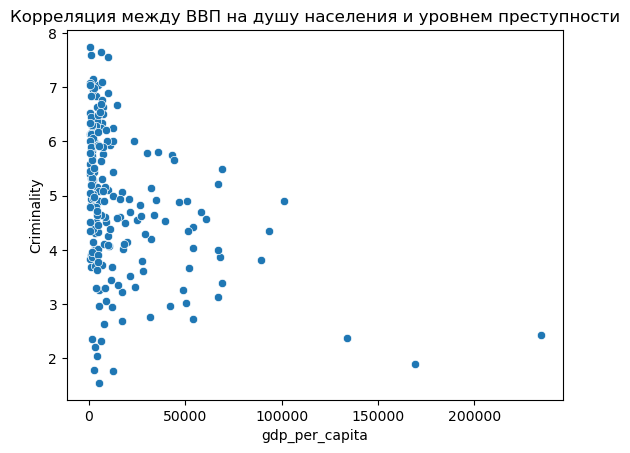

In [11]:
# Корреляционная матрица
correlation_matrix = merged_data[['Criminality', 'gdp_per_capita']].corr()
print(correlation_matrix)

# Визуализация
sns.scatterplot(x='gdp_per_capita', y='Criminality', data=merged_data)
plt.title('Корреляция между ВВП на душу населения и уровнем преступности')
plt.show()

In [12]:
# Модель линейной регрессии
X = merged_data['gdp_per_capita']
y = merged_data['Criminality']
X = sm.add_constant(X)  # Добавляем константу

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Criminality   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     26.42
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           6.75e-07
Time:                        18:58:04   Log-Likelihood:                -315.35
No. Observations:                 193   AIC:                             634.7
Df Residuals:                     191   BIC:                             641.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1439      0.104     49.

C:\Users\privet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\privet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


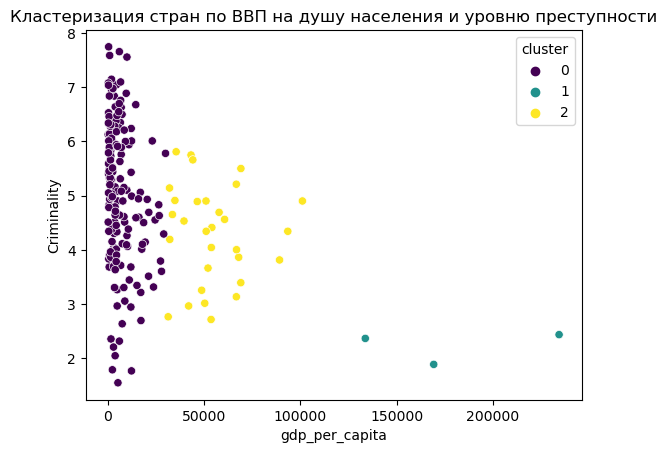

In [13]:
# Подготовка данных для кластеризации
X = merged_data[['Criminality', 'gdp_per_capita']]

# K-Means кластеризация
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
merged_data['cluster'] = kmeans.labels_

# Визуализация кластеров
sns.scatterplot(x='gdp_per_capita', y='Criminality', hue='cluster', data=merged_data, palette='viridis')
plt.title('Кластеризация стран по ВВП на душу населения и уровню преступности')
plt.show()

In [14]:
import sys
'geopandas' in sys.modules

False

In [15]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [16]:
import geopandas as gpd

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\privet\AppData\Local\Temp\ipykernel_15044\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [18]:
merged = world.merge(merged_data, how='right', left_on='name', right_on='Country')

In [19]:
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Continent,Region,Country,Criminality,...,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,gdp_per_capita,Code Value,cluster
0,83429615.0,Asia,Turkey,TUR,761425.0,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",Asia,Western Asia,Turkey,6.89,...,2,4,4,"3,5","3,5",2021,US$,9661.23,TUR,0
1,NaN,NaN,NaN,NaN,NaN,None,Africa,West Africa,Cabo Verde,4.04,...,5,6,"3,5",6,7,2021,US$,3293.23,CPV,0
2,58558270.0,Africa,South Africa,ZAF,351431.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",Africa,Southern Africa,South Africa,6.63,...,6,6,4,5,7,2021,US$,7055.06,ZAF,0
3,50339443.0,South America,Colombia,COL,323615.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",South America,South America,Colombia,7.66,...,6,5,"3,5","4,5","6,5",2021,US$,6104.14,COL,0
4,32510453.0,South America,Peru,PER,226848.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",South America,South America,Peru,6.35,...,"4,5",4,"3,5",3,"4,5",2021,US$,6621.65,PER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2948279.0,North America,Jamaica,JAM,16458.0,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",North America,Caribbean,Jamaica,5.91,...,"4,5","4,5",5,6,"6,5",2021,US$,5183.58,JAM,0
189,NaN,NaN,NaN,NaN,NaN,None,North America,Caribbean,St. Vincent and the Grenadines,3.30,...,"5,5",4,3,6,6,2021,US$,8440.03,VCT,0
190,2087946.0,Europe,Slovenia,SVN,54174.0,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",Europe,Central & Eastern Europe,Slovenia,4.29,...,"6,5",5,6,6,6,2021,US$,29134.80,SVN,0
191,NaN,NaN,NaN,NaN,NaN,None,North America,Caribbean,St. Lucia,4.09,...,4,"5,5",5,6,4,2021,US$,9824.06,LCA,0


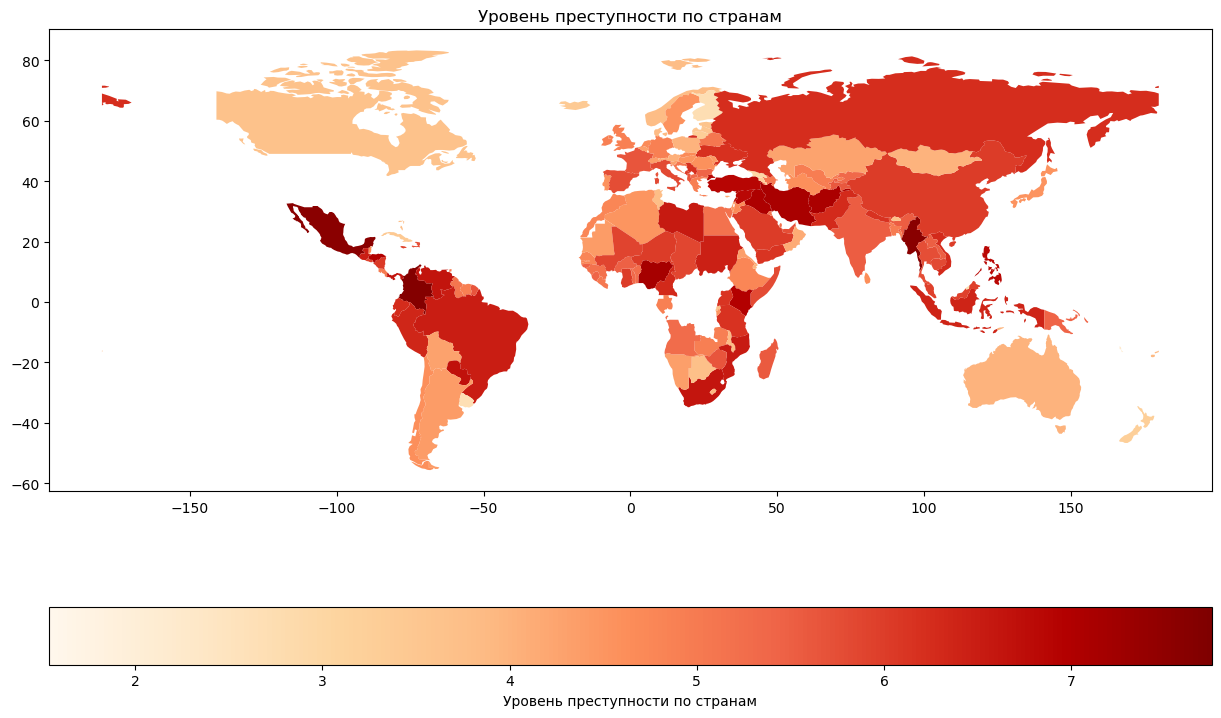

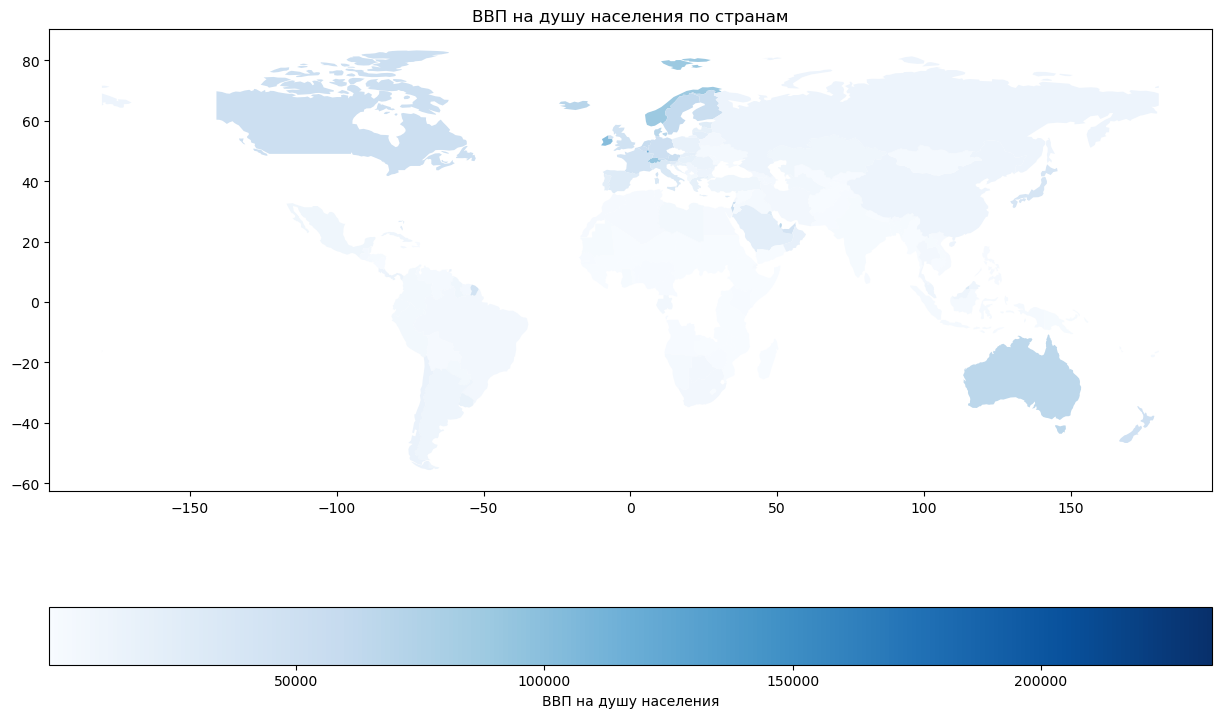

In [34]:
# Создание карты с уровнем преступности
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Criminality', ax=ax, legend=True, cmap='OrRd', 
            legend_kwds={'label': "Уровень преступности по странам",
                         'orientation': "horizontal"})
plt.title('Уровень преступности по странам')
plt.show()

# Создание карты с ВВП на душу населения
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='gdp_per_capita', ax=ax, legend=True, cmap='Blues', 
            legend_kwds={'label': "ВВП на душу населения",
                         'orientation': "horizontal"})
plt.title('ВВП на душу населения по странам')
plt.show()


In [3]:
??plt.subplots

In [45]:
'folium' in sys.modules

False

In [46]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
import folium 

In [52]:
# Создание интерактивной карты с уровнем преступности
m = folium.Map(location=[20, 0], zoom_start=2)

# Добавление границ стран и уровня преступности
folium.Choropleth(
    geo_data=world.__geo_interface__,
    data=merged,
    columns=['name', 'Criminality'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Уровень преступности'
).add_to(m)

m.save('crime_rate_map.html')




In [53]:
m

In [56]:
# Создание интерактивной карты с ВВП на душу населения
n = folium.Map(location=[20, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world.__geo_interface__,
    data=merged,
    columns=['name', 'gdp_per_capita'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='ВВП на душу населения'
).add_to(n)

n.save('gdp_per_capita_map.html')

In [57]:
n

In [59]:
merged_data['Heroin trade'] = merged_data['Heroin trade'].str.replace(',', '.')
merged_data['Heroin trade'] = merged_data['Heroin trade'].astype(float)

In [60]:
merged_data['Cocaine trade'] = merged_data['Cocaine trade'].str.replace(',', '.')
merged_data['Cocaine trade'] = merged_data['Cocaine trade'].astype(float)

In [67]:
merged_data['Human trafficking'] = merged_data['Human trafficking'].str.replace(',', '.')
merged_data['Human trafficking'] = merged_data['Human trafficking'].astype(float)

In [64]:
merged = world.merge(merged_data, how='right', left_on='name', right_on='Country')

In [65]:
merged.dtypes

pop_est                                        float64
continent                                       object
name                                            object
iso_a3                                          object
gdp_md_est                                     float64
geometry                                      geometry
Continent                                       object
Region                                          object
Country                                         object
Criminality                                    float64
Criminal markets                                object
Human trafficking                               object
Human smuggling                                 object
Arms trafficking                                object
Flora crimes                                    object
Fauna crimes                                    object
Non-renewable resource crimes                   object
Heroin trade                                   float64
Cocaine tr

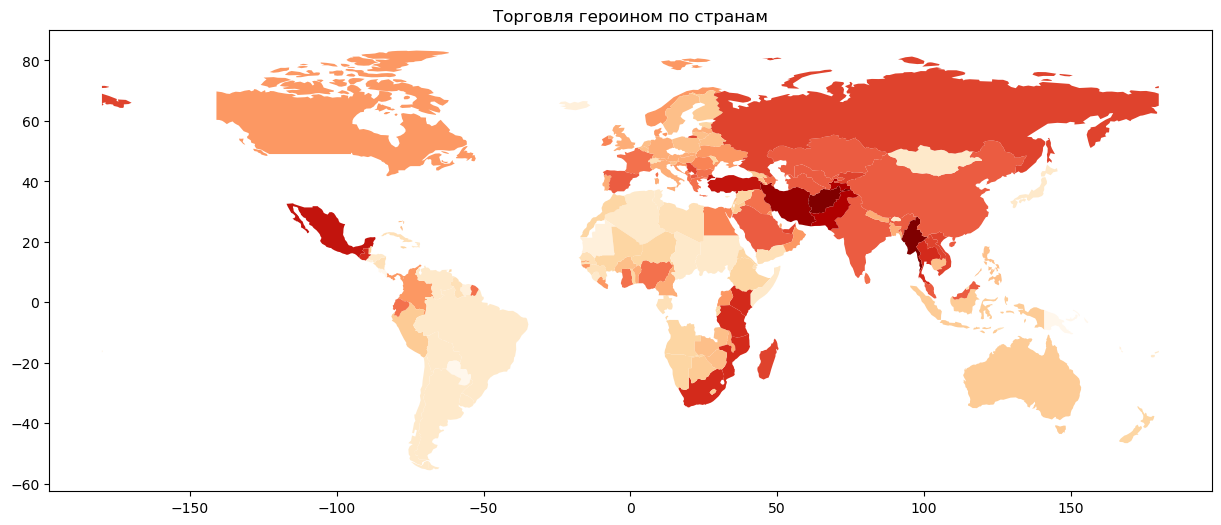

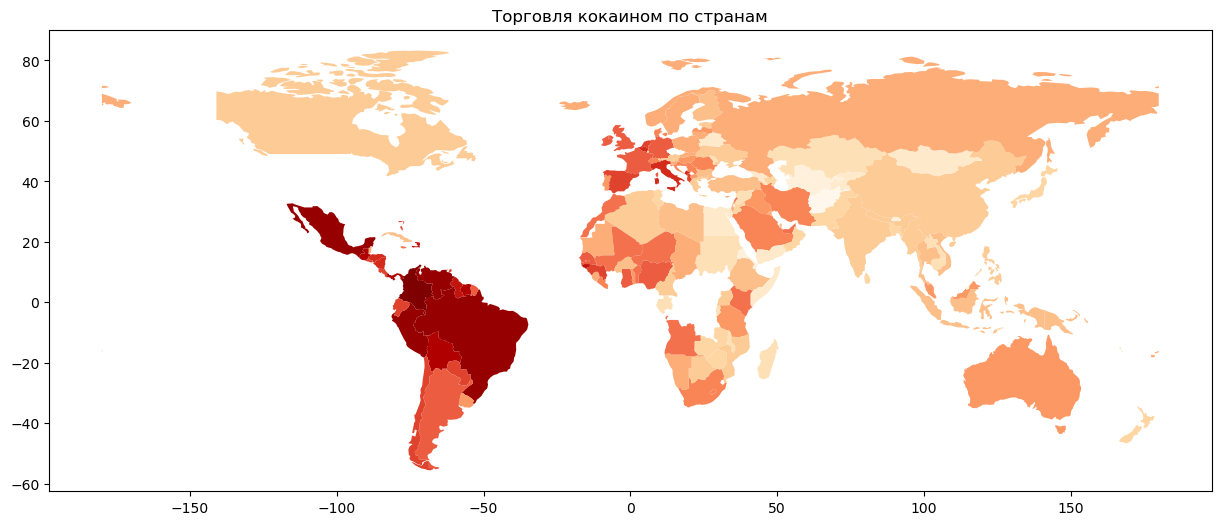

In [74]:
# Создание карты с уровнем торговли героином
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Heroin trade', ax=ax, legend=False, cmap='OrRd')
            
plt.title('Торговля героином по странам')
plt.show()

# Создание карты с уровнем торговли кокаином
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Cocaine trade', ax=ax, legend=False, cmap='OrRd')
            
plt.title('Торговля кокаином по странам')
plt.show()

                   Human trafficking  gdp_per_capita
Human trafficking           1.000000       -0.335889
gdp_per_capita             -0.335889        1.000000


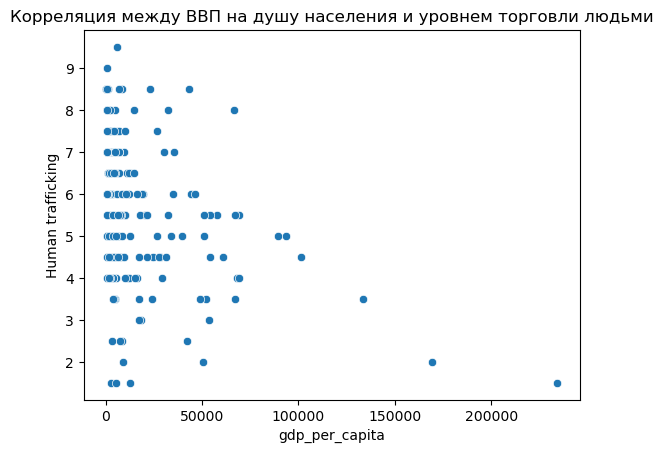

In [68]:
# Корреляционная матрица
correlation_matrix = merged_data[['Human trafficking', 'gdp_per_capita']].corr()
print(correlation_matrix)

# Визуализация
sns.scatterplot(x='gdp_per_capita', y='Human trafficking', data=merged_data)
plt.title('Корреляция между ВВП на душу населения и уровнем торговли людьми')
plt.show()

In [76]:
from scipy import stats
# Группировка данных по региону
grouped_by_region = merged_data.groupby('Region')


In [77]:
# ANOVA для сравнения уровня преступности между разными регионами
anova_crime_rate = stats.f_oneway(
    *[group['Criminality'].values for name, group in grouped_by_region]
)
print(f"ANOVA for Crime Rate: F-statistic = {anova_crime_rate.statistic}, p-value = {anova_crime_rate.pvalue}")

# ANOVA для сравнения ВВП на душу населения между разными регионами
anova_gdp = stats.f_oneway(
    *[group['gdp_per_capita'].values for name, group in grouped_by_region]
)
print(f"ANOVA for GDP per Capita: F-statistic = {anova_gdp.statistic}, p-value = {anova_gdp.pvalue}")


ANOVA for Crime Rate: F-statistic = 5.024105369921528, p-value = 3.5715716021439203e-10
ANOVA for GDP per Capita: F-statistic = 9.449562802712329, p-value = 9.207866574602403e-20
